In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
!pip install ucimlrepo

  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from ucimlrepo import fetch_ucirepo
air_quality = fetch_ucirepo(id=360)
air_quality

{'data': {'ids': None,
  'features':            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
  0     3/10/2004  18:00:00     2.6         1360       150      11.9   
  1     3/10/2004  19:00:00     2.0         1292       112       9.4   
  2     3/10/2004  20:00:00     2.2         1402        88       9.0   
  3     3/10/2004  21:00:00     2.2         1376        80       9.2   
  4     3/10/2004  22:00:00     1.6         1272        51       6.5   
  ...         ...       ...     ...          ...       ...       ...   
  9352   4/4/2005  10:00:00     3.1         1314      -200      13.5   
  9353   4/4/2005  11:00:00     2.4         1163      -200      11.4   
  9354   4/4/2005  12:00:00     2.4         1142      -200      12.4   
  9355   4/4/2005  13:00:00     2.1         1003      -200       9.5   
  9356   4/4/2005  14:00:00     2.2         1071      -200      11.9   
  
        PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
  0              1046      

In [4]:
data=air_quality.data.features
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [5]:
df=data[['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']]
df.head()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,11.9,166,113
1,2.0,9.4,103,92
2,2.2,9.0,131,114
3,2.2,9.2,172,122
4,1.6,6.5,131,116


In [6]:
#Isolation Forest Parameters
n_estimators = 100
max_samples = 'auto'
contamination = 0.01 #Assuming 1% of the data is anomalous
sample_size = 256
random_state = 42

In [7]:
#Train Isolation Forest
iso_forest = IsolationForest(n_estimators=n_estimators, max_samples=max_samples, contamination=contamination, random_state=random_state)
iso_forest.fit(df)
#Predict anomalies
anomaly_labels = iso_forest.predict(df)
#Add anomaly labels to the DataFrame(-1 for anomalies, 1 for normal)
df['anomaly'] = anomaly_labels

C:\Users\srira\AppData\Local\Temp\ipykernel_5196\1767875466.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anomaly'] = anomaly_labels


In [8]:
df.head()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT),anomaly
0,2.6,11.9,166,113,1
1,2.0,9.4,103,92,1
2,2.2,9.0,131,114,1
3,2.2,9.2,172,122,1
4,1.6,6.5,131,116,1


In [9]:
#Check the value counts of anomaly labels
df['anomaly'].value_counts()

anomaly
 1    9263
-1      94
Name: count, dtype: int64

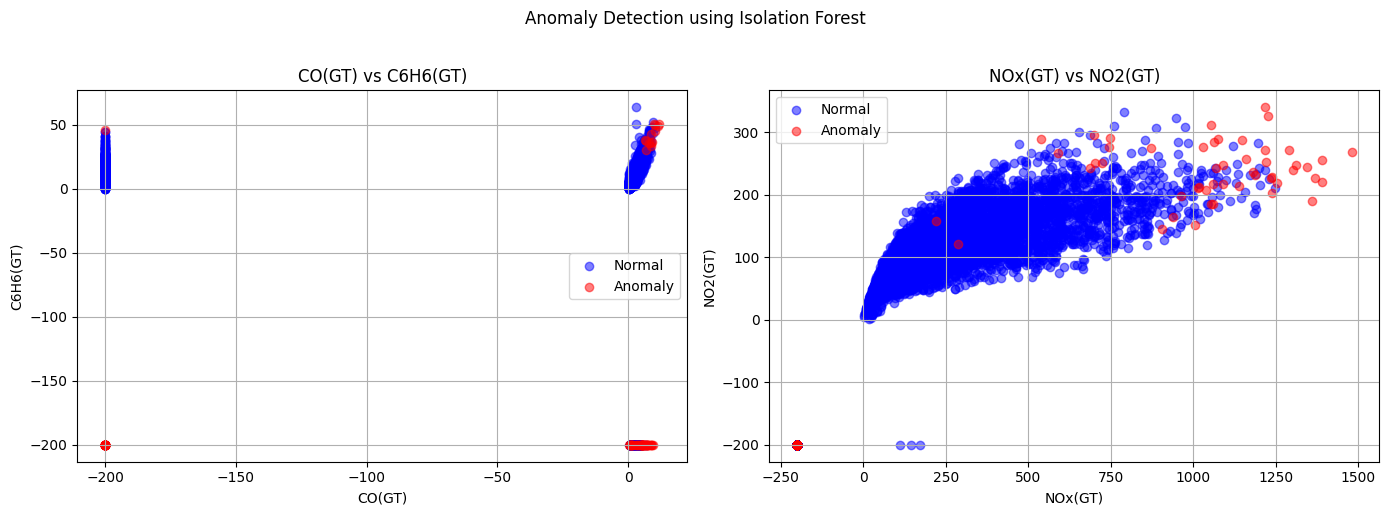

In [10]:
fig,axes=plt.subplots(1,2,figsize=(14,5))
normal_data=df[df['anomaly']==1]
anomalies=df[df['anomaly']==-1]
axes[0].scatter(normal_data['CO(GT)'], normal_data['C6H6(GT)'], color='blue', label='Normal', alpha=0.5)
axes[0].scatter(anomalies['CO(GT)'], anomalies['C6H6(GT)'], color='red', label='Anomaly', alpha=0.5)
axes[0].set_title('CO(GT) vs C6H6(GT)')
axes[0].set_xlabel('CO(GT)')
axes[0].set_ylabel('C6H6(GT)')
axes[0].legend()
axes[0].grid(True)
axes[1].scatter(normal_data['NOx(GT)'], normal_data['NO2(GT)'], color='blue', label='Normal', alpha=0.5)
axes[1].scatter(anomalies['NOx(GT)'], anomalies['NO2(GT)'], color='red', label='Anomaly', alpha=0.5)
axes[1].set_title('NOx(GT) vs NO2(GT)')
axes[1].set_xlabel('NOx(GT)')
axes[1].set_ylabel('NO2(GT)')
axes[1].legend()
axes[1].grid(True)
plt.suptitle('Anomaly Detection using Isolation Forest', y=1.02)
plt.tight_layout()
plt.show()  

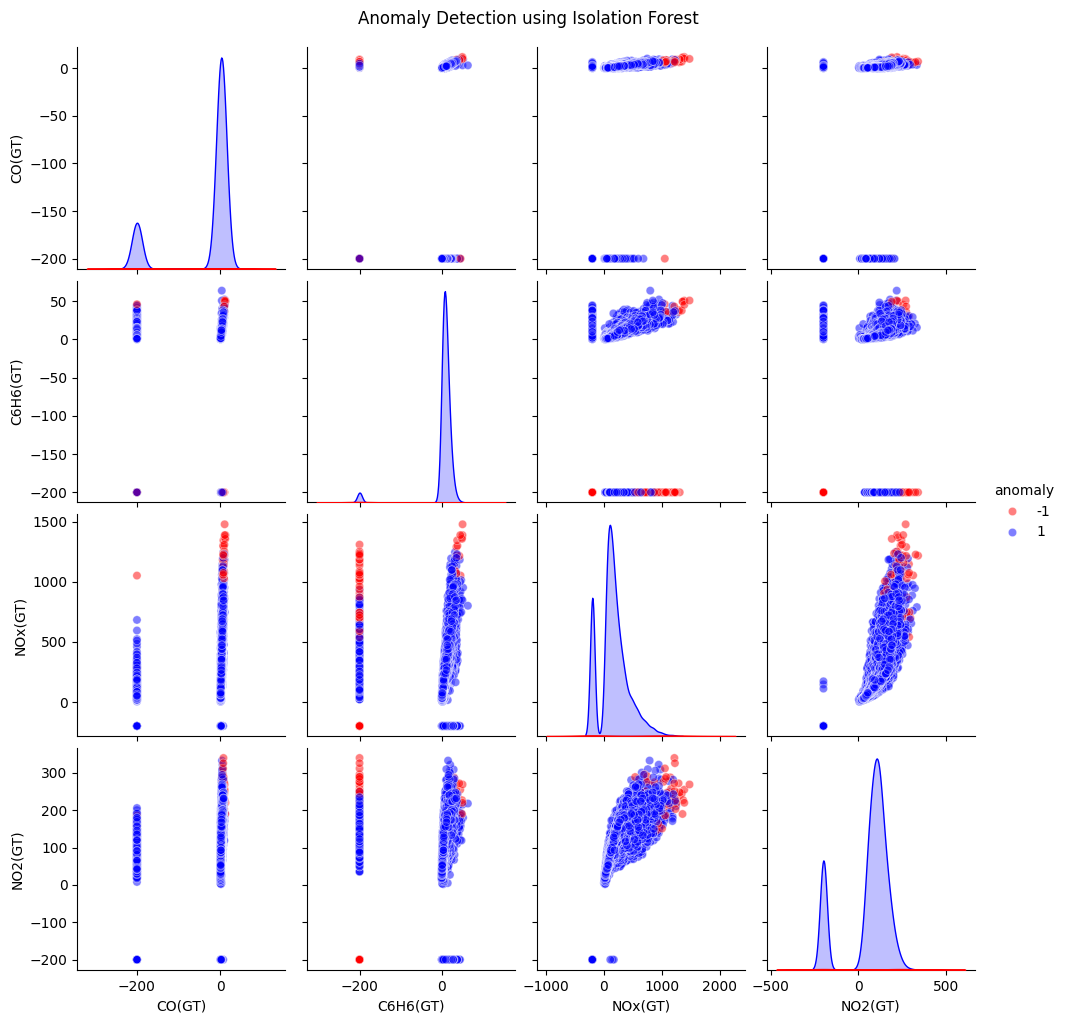

In [11]:
#Visualize anomalies
sns.pairplot(df, hue='anomaly', palette={1: 'blue', -1: 'red'},plot_kws={'alpha':0.5})
plt.suptitle('Anomaly Detection using Isolation Forest', y=1.02)
plt.show()

In [13]:
import joblib
joblib.dump(iso_forest, 'isolation_forest_model.pkl')

['isolation_forest_model.pkl']